In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
# ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download -d sachchitkunichetty/rvf10k


Dataset URL: https://www.kaggle.com/datasets/sachchitkunichetty/rvf10k
License(s): CC-BY-NC-SA-4.0
100% 272M/273M [00:15<00:00, 20.9MB/s]
100% 273M/273M [00:15<00:00, 18.9MB/s]


In [ ]:
! unzip rvf10k.zip

Streaming output truncated to the last 5000 lines.
  inflating: rvf10k/train/real/28056.jpg  
  inflating: rvf10k/train/real/28081.jpg  
  inflating: rvf10k/train/real/28160.jpg  
  inflating: rvf10k/train/real/28181.jpg  
  inflating: rvf10k/train/real/28190.jpg  
  inflating: rvf10k/train/real/28192.jpg  
  inflating: rvf10k/train/real/28194.jpg  
  inflating: rvf10k/train/real/28197.jpg  
  inflating: rvf10k/train/real/28199.jpg  
  inflating: rvf10k/train/real/28247.jpg  
  inflating: rvf10k/train/real/28281.jpg  
  inflating: rvf10k/train/real/28308.jpg  
  inflating: rvf10k/train/real/28316.jpg  
  inflating: rvf10k/train/real/28332.jpg  
  inflating: rvf10k/train/real/28342.jpg  
  inflating: rvf10k/train/real/28345.jpg  
  inflating: rvf10k/train/real/28347.jpg  
  inflating: rvf10k/train/real/28392.jpg  
  inflating: rvf10k/train/real/28395.jpg  
  inflating: rvf10k/train/real/28401.jpg  
  inflating: rvf10k/train/real/28412.jpg  
  inflating: rvf10k/train/real/28461.jpg  
  i

In [ ]:
# Directories for training, validation, and test datasets
base_path = '/content/rvf10k'


# # ImageDataGenerator without data augmentation
# train_datagen = ImageDataGenerator(rescale=1./255)


# train_generator = train_datagen.flow_from_directory(
#     os.path.join(base_path, 'train'),
#     target_size=(299, 299),
#     batch_size=32,
#     class_mode='binary'
# )
# ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for training dataset
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 7000 images belonging to 2 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(base_path, 'valid'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


In [ ]:
# def build_model():
#     # Load the InceptionResNetV2 model with pre-trained weights from ImageNet
#     base_model = InceptionResNetV2(
#         weights='imagenet', include_top=False, input_shape=(128, 128, 3))


#     # Freeze the base model
#     base_model.trainable = True

#     # Add custom layers on top of the base model
#     model = Sequential([
#         base_model,
#         GlobalAveragePooling2D(),
#         Dense(1024, activation='relu'),
#         # Dense(units=2, activation='softmax'),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])

#     # Compile the model
#     # model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
#     # model.compile(loss='binary_crossentropy',
#     #               optimizer=optimizers.Adam(
#     #                   lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False),
#     #               metrics=['accuracy'])
#     model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


#     return model
from tensorflow.keras.layers import Dropout

def build_model():
    # Load the InceptionResNetV2 model with pre-trained weights from ImageNet
    base_model = InceptionResNetV2(
        weights='imagenet', include_top=False, input_shape=(128, 128, 3))


    # Freeze the base model
    base_model.trainable = True

    # Add custom layers on top of the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.2),
        # Dense(units=2, activation='softmax'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    # model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    # model.compile(loss='binary_crossentropy',
    #               optimizer=optimizers.Adam(
    #                   lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False),
    #               metrics=['accuracy'])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


    return model


In [ ]:
# Build and train the model without augmented data
model = build_model()
model.summary()

219055592/219055592 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 2, 2, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                      

In [ ]:
history = model.fit(
    train_generator,
    # epochs=20,
    epochs=10,
    validation_data=valid_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# Save the model without augmented data
model.save('/content/drive/MyDrive/InceptionResNetV3/model/v1_lightweigh_model.h5')
model.save('/content/drive/MyDrive/InceptionResNetV3/model/v1_lightweigh_model.keras')



Epoch 1/10
218/218 [==============================] - 408s 1s/step - loss: 0.3366 - accuracy: 0.8441 - val_loss: 0.2604 - val_accuracy: 0.8935
Epoch 2/10
218/218 [==============================] - 300s 1s/step - loss: 0.1310 - accuracy: 0.9505 - val_loss: 0.0686 - val_accuracy: 0.9731
Epoch 3/10
218/218 [==============================] - 301s 1s/step - loss: 0.0832 - accuracy: 0.9671 - val_loss: 0.0783 - val_accuracy: 0.9724
Epoch 4/10
218/218 [==============================] - 300s 1s/step - loss: 0.0758 - accuracy: 0.9717 - val_loss: 0.0494 - val_accuracy: 0.9812
Epoch 5/10
218/218 [==============================] - 286s 1s/step - loss: 0.0499 - accuracy: 0.9826 - val_loss: 0.0746 - val_accuracy: 0.9728
Epoch 6/10
218/218 [==============================] - 288s 1s/step - loss: 0.0411 - accuracy: 0.9845 - val_loss: 0.0420 - val_accuracy: 0.9835
Epoch 7/10
218/218 [==============================] - 288s 1s/step - loss: 0.0368 - accuracy: 0.9861 - val_loss: 0.0943 - val_accuracy: 0.9748

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model.save('/content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned.keras')


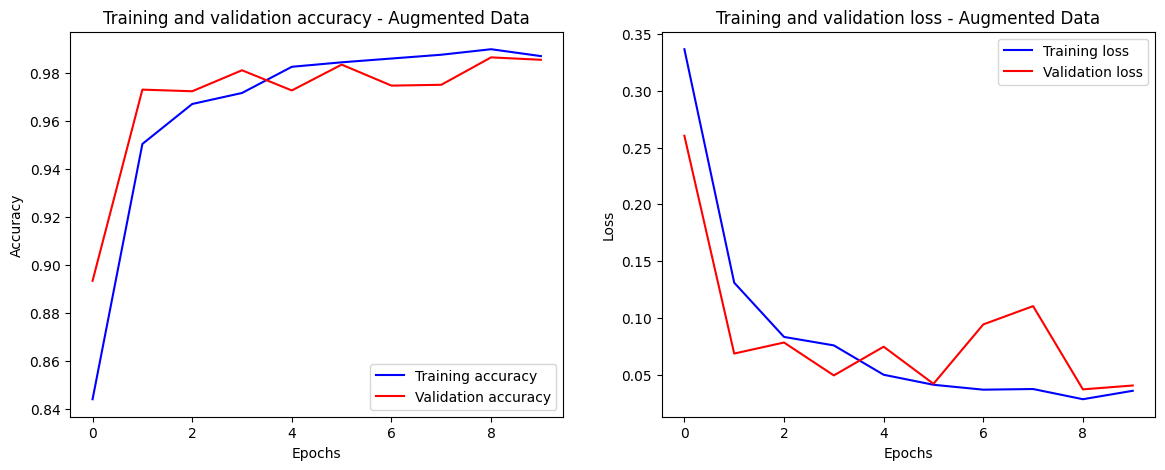

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training history


def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy - {title}')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss - {title}')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


# Build and train the model with augmented data
model_augmented = build_model()


# Plot the training history for the augmented model
plot_history(history, 'Augmented Data')

In [3]:
! kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.75G/3.75G [03:55<00:00, 15.9MB/s]
100% 3.75G/3.75G [03:55<00:00, 17.1MB/s]


In [ ]:
! unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/train/fake/2XLO3XY1F3.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XQCC68T9O.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XQIK4VW7P.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XRL67R2WX.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XSAMOAHDI.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XTNJE94DJ.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XTVOKCXQH.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XU7DLBNWW.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XUJJU9KQB.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XUNP2BVAN.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XVHY45IO7.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XVOCO0SDS.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XZA93HYT0.jpg  
  inflating: real_vs_fake/real-vs-fake/train/fake/2XZPKTJETM.jpg  
  inflating

In [5]:
test_path = '/content/real_vs_fake/real-vs-fake'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(test_path, 'test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 20000 images belonging to 2 classes.


In [ ]:
# Evaluate the model without augmented data on the test set
test_loss_non_aug, test_acc_non_aug = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy without data augmentation: {test_acc_non_aug:.2f}')


# # Evaluate the model with augmented data on the test set
# test_loss_aug, test_acc_aug = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
# print(f'Test accuracy with data augmentation: {test_acc_aug:.2f}')

In [7]:
# import model from /content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned_tenepoch.keras
model = tf.keras.models.load_model('/content/drive/MyDrive/InceptionResNetV3/model/v1_lightweigh_model.keras')

In [8]:
from sklearn import metrics

y_pred = model.predict(test_generator)
y_true = test_generator.classes

625/625 [==============================] - 212s 318ms/step


In [10]:
print("ROC AUC Score:", metrics.roc_auc_score(y_true, y_pred))
print("AP Score:", metrics.average_precision_score(y_true, y_pred))
print()
print(metrics.classification_report(y_true, y_pred > 0.5))

ROC AUC Score: 0.998901925
AP Score: 0.9989652288342549

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10000
           1       0.99      0.98      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



<Figure size 800x600 with 0 Axes>

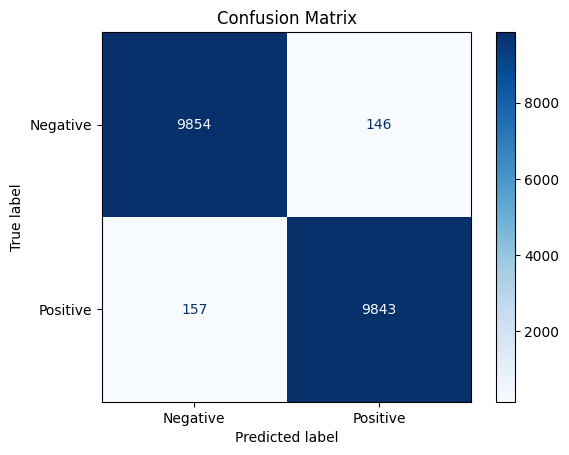

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred > 0.5)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred > 0.5)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[9854  146]
 [ 157 9843]]


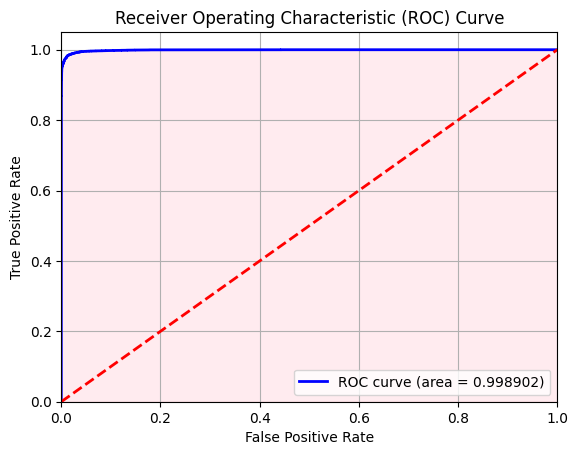

In [17]:

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='blue', lw=lw, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.fill_between(fpr, tpr, color='pink', alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from collections import Counter

# Count occurrences of each class label
class_counts = Counter(y_true)

# Print or plot the class counts (e.g., using libraries like matplotlib)
print(class_counts)

# Calculate class imbalance ratio (if applicable)
if len(class_counts) == 2:
  majority_class = class_counts.most_common(1)[0][0]
  minority_class = class_counts.most_common(2)[0][0]
  class_imbalance_ratio = class_counts[majority_class] / class_counts[minority_class]
  print(f"Class imbalance ratio: {class_imbalance_ratio}")


Counter({0: 10000, 1: 10000})
Class imbalance ratio: 1.0


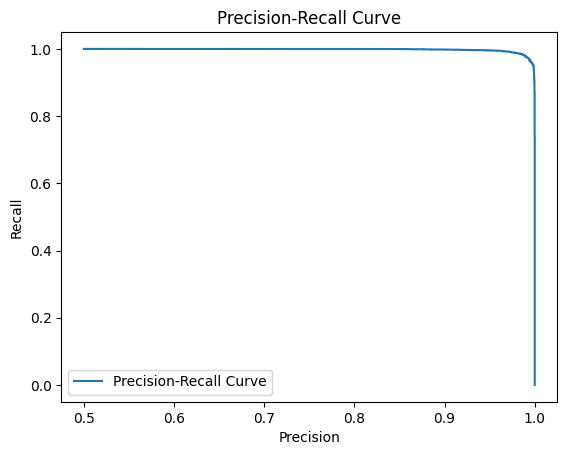

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Plot the precision-recall curve (e.g., using libraries like matplotlib)
import matplotlib.pyplot as plt

plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


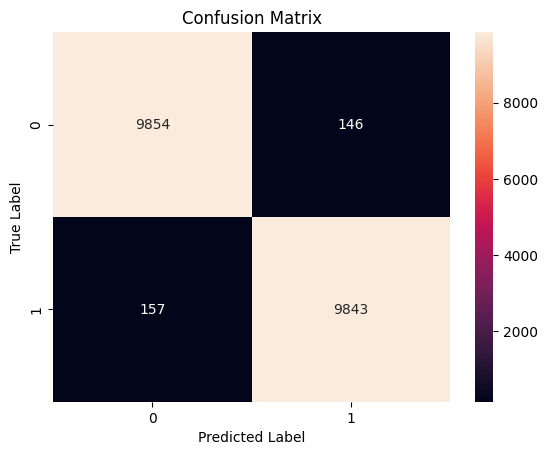


Class: Real Video
True Positives: 9854
False Positives: 146
False Negatives: 157
True Negatives: 9843

Class: Deepfake
True Positives: 9843
False Positives: 157
False Negatives: 146
True Negatives: 9854


In [ ]:
# from sklearn.metrics import confusion_matrix

# # Get the confusion matrix
# cm = confusion_matrix(y_true, y_pred)

# Print or plot the confusion matrix (e.g., using libraries like seaborn)
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Analyze confusion matrix for each class (optional)
class_labels = ["Real Video", "Deepfake"]  # Adjust class labels as needed
for i, class_label in enumerate(class_labels):
  print(f"\nClass: {class_label}")
  print(f"True Positives: {cm[i, i]}")
  print(f"False Positives: {cm[i, (i+1) % 2]}")
  print(f"False Negatives: {cm[(i+1) % 2, i]}")
  print(f"True Negatives: {cm[(i+1) % 2, (i+1) % 2]}")


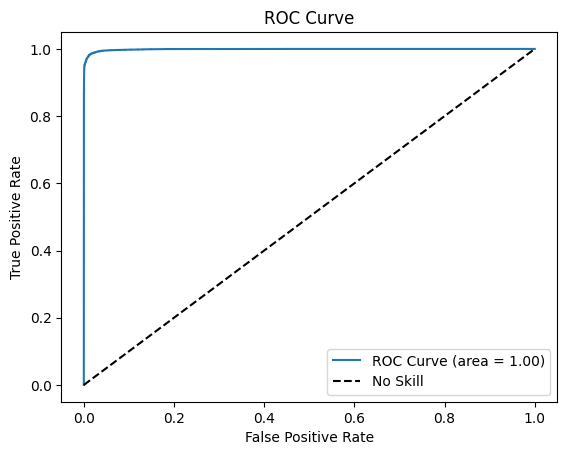

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the ROC curve elements
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


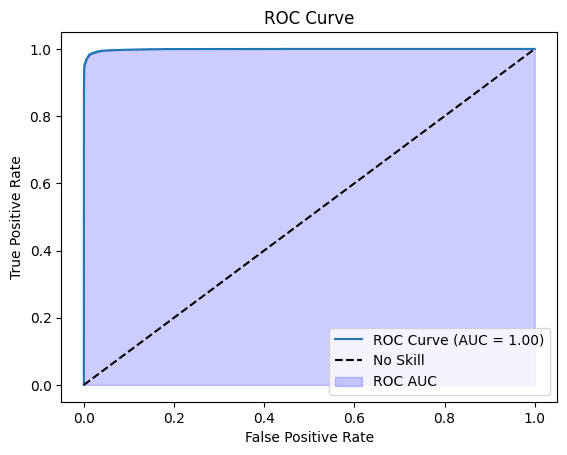

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the ROC curve elements
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve with shaded area
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.fill_between(fpr, tpr, alpha=0.2, color='b', label='ROC AUC')  # Add shaded area

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# ***This is the experiment for the 2nd grade model - which is less accurate than the above model***






In [19]:
# import model from /content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned_tenepoch.keras
model = tf.keras.models.load_model('/content/drive/MyDrive/InceptionResNetV3/model/deepfake_detector_inception_resnetv2_finetuned_tenepoch.keras')

In [24]:
from sklearn import metrics

y_pred = model.predict(test_generator)
y_true = test_generator.classes

625/625 [==============================] - 200s 314ms/step


In [25]:
print("ROC AUC Score:", metrics.roc_auc_score(y_true, y_pred))
print("AP Score:", metrics.average_precision_score(y_true, y_pred))
print()
print(metrics.classification_report(y_true, y_pred > 0.5))

ROC AUC Score: 0.99759144
AP Score: 0.9978409450070924

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10000
           1       0.94      0.99      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



<Figure size 800x600 with 0 Axes>

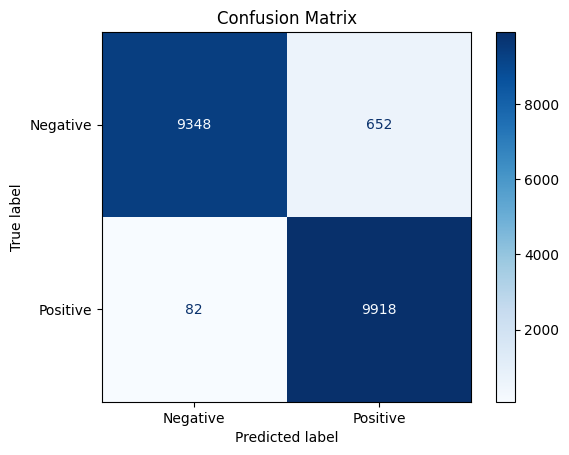

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred > 0.5)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



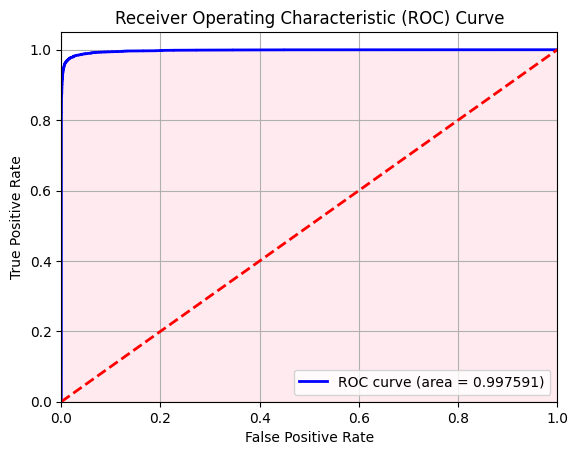

In [27]:

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='blue', lw=lw, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.fill_between(fpr, tpr, color='pink', alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()